WUBC - initial data prep
* read in pickle
* split into chapters
* run several functions to chunk the text
* all in dataframes this time compared to lists in tex_prep_v02

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import textacy
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pickle

In [6]:
import pickle

In [7]:
book_dict = {'The Elephant Vanishes': 'ev_birnbaum_rubin_v01', 
             'Norwegian Wood 1': 'nw_birnbaum_v01', 
             'Norwegian Wood 2': 'nw_rubin_v01',
             'Wild Sheep Chase': 'wsc_birnbaum_v01', 
             'Wind Up Bird Chronicle': 'wubc_all_rubin_v01', 
             'Sputnik Sweetheart': 'ss_gabriel_v01',
             'Kafka on the Shore': 'kots_gabriel_v01'}

In [8]:
books = pd.DataFrame.from_dict(book_dict, orient='index').reset_index()
books.columns = ['Title', 'Pickle']
books

,Title,Pickle
0,The Elephant Vanishes,ev_birnbaum_rubin_v01
1,Norwegian Wood 1,nw_birnbaum_v01
2,Norwegian Wood 2,nw_rubin_v01
3,Wild Sheep Chase,wsc_birnbaum_v01
4,Wind Up Bird Chronicle,wubc_all_rubin_v01
5,Sputnik Sweetheart,ss_gabriel_v01
6,Kafka on the Shore,kots_gabriel_v01


In [9]:
def load_pickle(filename):
    in_path = '../../../../Documents/murakami/pkl/' + filename + '.pkl'
    with open (in_path, 'rb') as fp:
        return pickle.load(fp)

In [10]:
books['full_text'] = books['Pickle'].apply(load_pickle)

In [11]:
books

,Title,Pickle,full_text
0,The Elephant Vanishes,ev_birnbaum_rubin_v01,I’M IN THE kitchen cooking spaghetti when the ...
1,Norwegian Wood 1,nw_birnbaum_v01,C H II P T E R 6 (rontinutd) The scene at dinn...
2,Norwegian Wood 2,nw_rubin_v01,[Haruki Murakami Norwegian Wood This book was ...
3,Wild Sheep Chase,wsc_birnbaum_v01,"[\n , \n \n \n , Contents \n Cover \n About th..."
4,Wind Up Bird Chronicle,wubc_all_rubin_v01,[1 \n Tuesday’s Wind-up Bird \n ♦ \n Six Finge...
5,Sputnik Sweetheart,ss_gabriel_v01,[Haruki Murakami None This book was produced i...
6,Kafka on the Shore,kots_gabriel_v01,[Kafka on the Shore \n Haruki Murakami \n \n \...


In [12]:
# books.iloc[0,2]

In [13]:
wubc = books['full_text'].iloc[4]

In [14]:
# wsc is read from an epub and is a list of texts
len(wubc)

70

In [15]:
# for x in range(len(wubc)):
#     print(wubc[x][:100], '\n')

In [16]:
# pattern = re.compile(r'\n ([\d\w]+) \n \n ([^\n]+) \n ([\w\W]+)')
# pattern = re.compile(r'(\d+) \n ([\d\w\W]+) \n [♦•] \n ([^\n]+) \n ([\w\W]+)')
# pattern = re.compile(r'(\d+) \n ([\d\w\W]+) \n (♦|•) \n ([^\n]+) \n ([\w\W]+)')
pattern = re.compile(r'(\d+) \n ([\w\s]+) \n \W \n [\w\W]+')
re.findall(pattern, wubc[3])

[]

In [17]:
texts = wubc

In [18]:
# regex pattern to extract chapter number, title and main text from a complete chapter
# pattern = re.compile(r'\n ([\d\w]+) \n \n ([^\n]+) \n ([\w\W]+)')
# first pattern for most chapters
# pattern1 = re.compile(r'(\d+) \n ([\d\w\W]+) \n ♦ \n ([^\n]+) \n ([\w\W]+)')
pattern1 = re.compile(r'(\d+) \n ([\d\w\W\(\)]+ \n ♦ \n [^\n]+) \n ([\w\W]+)')
#  second pattern for some irregular chapters - useful finding first few all capitals
pattern2 = re.compile(r'(\d+) \n ([\d\w\W]+) \n ([A-Z]{1,}\s[A-Z]{2,}[\d\w\W]+)')

ch_nos = []
ch_titles = []
ch_texts = []

for t in range(0,len(texts)):
#     print(t)
    out = re.findall(pattern1, texts[t])
    if len(out) > 0:
        ch_nos.append(out[0][0])
        ch_titles.append(out[0][1])
        ch_texts.append(out[0][2])
    else:
        try:
            out = re.findall(pattern2, texts[t])
            ch_nos.append(out[0][0])
            ch_titles.append(out[0][1])
            ch_texts.append(out[0][2])
        except:
            ch_nos.append(None)
            ch_titles.append(None)
            ch_texts.append(out)
        

In [19]:
# regex pattern to extract chapter number, title and main text from a complete chapter
# pattern = re.compile(r'\n ([\d\w]+) \n \n ([^\n]+) \n ([\w\W]+)')
# first pattern for most chapters
# pattern1 = re.compile(r'(\d+) \n ([\d\w\W]+) \n ♦ \n ([^\n]+) \n ([\w\W]+)')
pattern1 = re.compile(r'(\d+) \n ([\d\w\W\n]+ \n ♦ \n [^\n]+) \n ([\w\W]+)')
#  second pattern for some irregular chapters - useful finding first few all capitals
pattern2 = re.compile(r'(\d+) \n ([\d\w\W]+) \n ([A-Z]{1,}\s[A-Z]{2,}[\d\w\W]+)')

ch_nos = []
ch_titles = []
ch_texts = []

for t in range(0,len(texts)):
#     print(t)
    out = re.findall(pattern1, texts[t])
    if len(out) > 0:
        ch_nos.append(out[0][0])
        ch_titles.append(out[0][1])
        ch_texts.append(out[0][2])
    else:
        try:
            out = re.findall(pattern2, texts[t])
            ch_nos.append(out[0][0])
            ch_titles.append(out[0][1])
            ch_texts.append(out[0][2])
        except:
            ch_nos.append(None)
            ch_titles.append(None)
            ch_texts.append(out)

In [20]:
chapters = pd.DataFrame({'number': ch_nos, 'title': ch_titles, 'text': ch_texts})
chapters.head(10)

,number,title,text
0,1,Tuesday’s Wind-up Bird \n ♦ \n Six Fingers and...,"WHEN THE PHONE rang I was in the kitchen, boi..."
1,2,Full Moon and Eclipse of the Sun \n ♦ \n On Ho...,"IS IT POSSIBLE , in the final analysis, for on..."
2,3,Malta Kano’s Hat \n ♦ \n Sherbet Tone and Alle...,I WAS IN the middle of preparing lunch when t...
3,4,"High Towers and Deep Wells \n (Or, Far from No...","I listened, making suitable responses. I hear..."
4,5,Hooked on Lemon Drops \n ♦ \n Flightless Bird ...,"AFTER DOING THE breakfast dishes, I rode my b..."
5,6,On the Births of Kumiko Okada \n and Noboru Wa...,"BROUGHT UP AS an only child, I find it diffic..."
6,7,The Happy Cleaners \n ♦ \n And Creta Kano Make...,I TOOK A blouse and skirt of Kumiko’s to the ...
7,8,Creta Kano’s Long Story \n ♦ \n An Inquiry int...,"“ I WAS BORN on May 29,” Creta Kano began her..."
8,9,Culverts and an Absolute \n Insufficiency of E...,"AFTER SEEING KUMIKO off the next morning, I w..."
9,10,Magic Touch \n ♦ \n Death in the Bathtub \n ♦ ...,WE HAD MOVED into our present house in the au...


In [21]:
chapters.iloc[2,1]

'Malta Kano’s Hat \n ♦ \n Sherbet Tone and Allen Ginsberg and the Crusaders'

In [22]:
chapters.iloc[3,1]

'High Towers and Deep Wells \n (Or, Far from Nomonhan) \n ♦ \n BACK AT HOME , I found Kumiko in a good mood.  A  very  good mood.  It was almost 6 o’clock by the time I arrived home after seeing Malta Kano, which meant I had no time to fix a proper dinner.  Instead, I prepared a simple meal from what I found in the freezer, and we each had a beer.  She talked about work, as she always did when she was in a good mood: whom she had seen at the office, what she had done, which of her colleagues had talent and which did not.  That kind of thing.'

In [23]:
# function to find indices of full stops in a text
def fs_indexer(x):
    return [i for i, char in enumerate(x) if char == "."]

In [24]:
chapters['fstop_indices'] = chapters['text'].apply(lambda x: fs_indexer(x))

In [25]:
chapters.dropna(inplace=True)
chapters.tail(30)

,number,title,text,fstop_indices
39,9,"The Zoo Attack \n (or, A Clumsy Massacre) \n •","NUTMEG AKASAKA TOLD the story of the tigers, ...","[156, 254, 279, 329, 459, 536, 841, 913, 990, ..."
41,11,Is This Shovel a Real Shovel? \n (What Happene...,"AFTER HE FELL into a deep sleep, the boy had ...","[59, 127, 193, 222, 267, 319, 376, 467, 535, 6..."
42,12,M’s Secret Cure \n •,SHOW BUSINESS WORLD TAINTED BY OCCULT \n [From...,"[287, 551, 624, 764, 889, 955, 1033, 1155, 137..."
43,13,The Waiting Man \n ♦ \n What Couldn’t Be Shake...,EIGHT O’CLOCK CAME and went and everything wa...,"[111, 147, 284, 424, 478, 611, 691, 791, 891, ..."
44,14,Cinnamon’s Strange Sign Language \n ♦ \n The M...,“ CINNAMON STOPPED TALKING once and for all j...,"[95, 151, 204, 300, 351, 447, 494, 516, 637, 6..."
45,15,This Could Be the End of the Line \n (May Kasa...,"Last time, I got as far as telling you about h...","[132, 175, 316, 453, 484, 579, 831, 929, 985, ..."
46,16,The World’s Exhaustion and Burdens \n ♦ \n The...,THE PHONE RANG at 9.30 at night. It rang onc...,"[20, 32, 88, 123, 167, 184, 268, 350, 436, 532..."
47,17,The Fitting Room \n ♦ \n A Successor,NUTMEG KNEW NOTHING about the women who came ...,"[52, 125, 200, 293, 448, 622, 700, 857, 909, 1..."
48,18,A Stupid Tree Frog Daughter \n (May Kasahara’s...,It’s 2.30 in the morning. All my neighbours a...,"[6, 24, 127, 233, 339, 393, 511, 663, 748, 990..."
49,19,The Subterranean Labyrinth \n ♦ \n Cinnamon’s ...,"“ THERE’S A COMPUTER in that house, isn’t the...","[112, 207, 250, 285, 338, 443, 514, 547, 668, ..."


In [26]:
# function to find indices of full stops in a text
def split_indexer(text, n=1000):
    fstop_indices = fs_indexer(text)
    split_indices = []
    try:
        for j in range(n, len(text), n):
            i = 0
    # keep going through the indices while less than the 1000 step
            while fstop_indices[i] < j:
                i += 1
    # append list with the index of the full stop before the 1000 step
            split_indices.append(fstop_indices[i-1])
    except:
        split_indices = np.NaN


    return split_indices

In [27]:
chapters['split_indices'] = chapters['text'].apply(lambda x: split_indexer(x))

In [28]:
chapters.tail(20)

,number,title,text,fstop_indices,split_indices
50,20,Nutmeg’s Story \n ♦ \n NUTMEG AKASAKA TOOK se...,• \n Nutmeg and her mother escaped from Manchu...,"[132, 300, 389, 538, 712, 891, 1109, 1231, 128...","[891, 1963, 2963, 3915, 4939, 5996, 6984, 7951..."
51,21,The Mystery of the Hanging House: 2 \n ♦ \n SE...,"Famous Politician’s Shadow: Now You See It, No...","[334, 457, 714, 842, 943, 1068, 1205, 1372, 15...","[943, 1961, 2858, 3964, 4889, 5980, 6957]"
52,22,Jellyfish from All Around the World \n ♦ \n Th...,I SIT DOWN in front of Cinnamon’s computer at...,"[125, 180, 236, 323, 402, 560, 620, 885, 1019,...","[885, 1980, 2998, 3981, 4966, 5991, 6941, 7945..."
53,23,Counting Sheep \n ♦ \n The Thing in the Centre...,"A FEW DAYS after Ushikawa’s first visit, I as...","[116, 201, 269, 352, 403, 513, 639, 730, 801, ...",NaN
54,24,The Signal Turns Red \n ♦ \n The Long Arm Reac...,CINNAMON WAS NOT alone when he arrived at 9 o...,"[69, 135, 176, 301, 504, 571, 680, 736, 779, 8...","[980, 1980, 2989, 3989, 4980, 5948, 6992, 7979..."
55,25,Triangular Ears \n ♦ \n Sleigh Bells,I SPENT THE rest of the day reading about Man...,"[52, 98, 208, 269, 342, 380, 496, 565, 614, 66...","[977, 1968, 2990]"
56,26,"The Wind-up Bird Chronicle No. 8 \n (or, A Se...","Today, however, should have been different fro...","[62, 89, 241, 346, 385, 457, 485, 657, 736, 80...","[991, 1770, 2928, 3893, 4984, 5936, 6959, 7978..."
57,27,Cinnamon’s Missing Links \n ♦ \n HERE ENDED “T...,• \n I exited the document to return to the or...,"[102, 107, 156, 259, 282, 309, 323, 355, 406, ...","[981, 1985, 2801, 3992, 4946, 5925, 6907, 7994..."
58,28,You Just Can’t Trust a House \n (May Kasahara’...,I wrote at the end of my last letter that I ha...,"[142, 269, 391, 617, 733, 875, 1101, 1158, 126...","[875, 1923, 2919, 3919, 4995, 5923, 6925, 7992..."
59,29,A Vacant House Is Born \n ♦ \n THE NEXT MORNIN...,"I gave up waiting for him, left the window, an...","[84, 211, 364, 538, 675, 752, 836, 871, 906, 1...","[906, 1996, 2949]"


In [29]:
chapters.dropna(inplace=True)

In [30]:
# function to chunk a text
def text_chunker(text):
    split_indices = split_indexer(text)
    chunks = []
    for i, idx in enumerate(split_indices):
# if first split then start at index 0 and keep up to the full stop index (including the full stop)
        if i == 0:
            chunks.append(text[0:idx+1])
# else start from the end of the previous chunk after the full stop until the next
        else:
            chunks.append(text[split_indices[i-1]+2:idx+1])
    return chunks

In [31]:
chapters['chunks'] = chapters['text'].apply(lambda x: text_chunker(x))

In [32]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks
0,1,Tuesday’s Wind-up Bird \n ♦ \n Six Fingers and...,"WHEN THE PHONE rang I was in the kitchen, boi...","[215, 377, 413, 461, 538, 594, 666, 737, 759, ...","[968, 1946, 2996, 3973, 4966, 5879, 6990, 7902...","[WHEN THE PHONE rang I was in the kitchen, bo..."
1,2,Full Moon and Eclipse of the Sun \n ♦ \n On Ho...,"IS IT POSSIBLE , in the final analysis, for on...","[458, 558, 625, 676, 778, 940, 1041, 1091, 118...","[940, 1999, 2990, 3955, 4955, 5911, 6963, 7884...","[IS IT POSSIBLE , in the final analysis, for o..."
2,3,Malta Kano’s Hat \n ♦ \n Sherbet Tone and Alle...,I WAS IN the middle of preparing lunch when t...,"[65, 287, 352, 499, 534, 556, 584, 654, 717, 8...","[983, 1978, 2999, 3993, 4996, 5911, 6967, 7981...",[I WAS IN the middle of preparing lunch when ...
3,4,"High Towers and Deep Wells \n (Or, Far from No...","I listened, making suitable responses. I hear...","[37, 88, 151, 275, 309, 420, 517, 602, 641, 69...","[897, 1861, 2946, 3953, 4988, 5931, 6994, 7985...","[I listened, making suitable responses. I hea..."
4,5,Hooked on Lemon Drops \n ♦ \n Flightless Bird ...,"AFTER DOING THE breakfast dishes, I rode my b...","[81, 268, 373, 467, 618, 754, 790, 911, 983, 1...","[983, 1918, 2875, 3850, 4944, 5979, 6916, 7950...","[AFTER DOING THE breakfast dishes, I rode my ..."


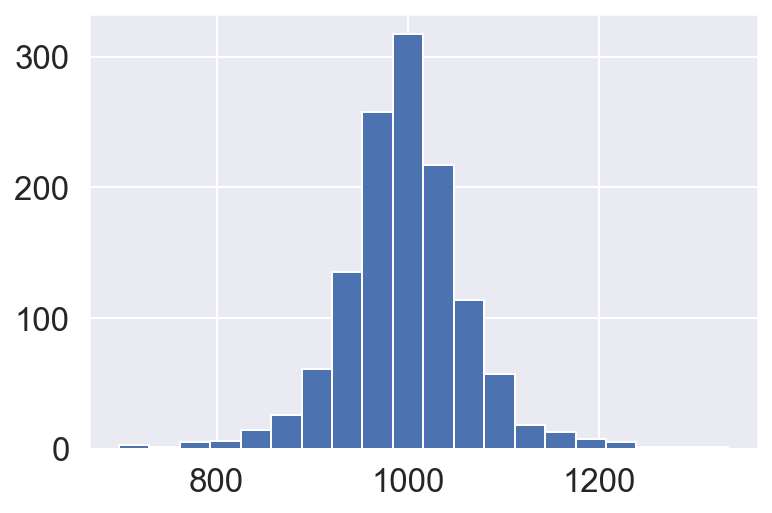

In [33]:
lengths = []
for chapter in chapters['chunks']:
    for chunk in chapter:
        lengths.append(len(chunk))
plt.hist(lengths, bins=20);

In [34]:
len(lengths)

1260

In [35]:
chapters['translator'] = 'Jay Rubin'

In [36]:
chapters['book_title'] = 'The Wind Up Bird Chronicle'

In [37]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks,translator,book_title
0,1,Tuesday’s Wind-up Bird \n ♦ \n Six Fingers and...,"WHEN THE PHONE rang I was in the kitchen, boi...","[215, 377, 413, 461, 538, 594, 666, 737, 759, ...","[968, 1946, 2996, 3973, 4966, 5879, 6990, 7902...","[WHEN THE PHONE rang I was in the kitchen, bo...",Jay Rubin,The Wind Up Bird Chronicle
1,2,Full Moon and Eclipse of the Sun \n ♦ \n On Ho...,"IS IT POSSIBLE , in the final analysis, for on...","[458, 558, 625, 676, 778, 940, 1041, 1091, 118...","[940, 1999, 2990, 3955, 4955, 5911, 6963, 7884...","[IS IT POSSIBLE , in the final analysis, for o...",Jay Rubin,The Wind Up Bird Chronicle
2,3,Malta Kano’s Hat \n ♦ \n Sherbet Tone and Alle...,I WAS IN the middle of preparing lunch when t...,"[65, 287, 352, 499, 534, 556, 584, 654, 717, 8...","[983, 1978, 2999, 3993, 4996, 5911, 6967, 7981...",[I WAS IN the middle of preparing lunch when ...,Jay Rubin,The Wind Up Bird Chronicle
3,4,"High Towers and Deep Wells \n (Or, Far from No...","I listened, making suitable responses. I hear...","[37, 88, 151, 275, 309, 420, 517, 602, 641, 69...","[897, 1861, 2946, 3953, 4988, 5931, 6994, 7985...","[I listened, making suitable responses. I hea...",Jay Rubin,The Wind Up Bird Chronicle
4,5,Hooked on Lemon Drops \n ♦ \n Flightless Bird ...,"AFTER DOING THE breakfast dishes, I rode my b...","[81, 268, 373, 467, 618, 754, 790, 911, 983, 1...","[983, 1918, 2875, 3850, 4944, 5979, 6916, 7950...","[AFTER DOING THE breakfast dishes, I rode my ...",Jay Rubin,The Wind Up Bird Chronicle


In [38]:
out_path = '../../../../Documents/murakami/pkl2/'
out_name = 'wubc_rubin_v01'
out_full_path = out_path + out_name + '.pkl'

In [40]:
# save pickle
with open(out_full_path, 'wb') as fp:
    pickle.dump(chapters, fp)


# read back pickle
with open (out_full_path, 'rb') as fp:
    read_wubc = pickle.load(fp)

In [41]:
read_wubc

,number,title,text,fstop_indices,split_indices,chunks,translator,book_title
0,1,Tuesday’s Wind-up Bird \n ♦ \n Six Fingers and...,"WHEN THE PHONE rang I was in the kitchen, boi...","[215, 377, 413, 461, 538, 594, 666, 737, 759, ...","[968, 1946, 2996, 3973, 4966, 5879, 6990, 7902...","[WHEN THE PHONE rang I was in the kitchen, bo...",Jay Rubin,The Wind Up Bird Chronicle
1,2,Full Moon and Eclipse of the Sun \n ♦ \n On Ho...,"IS IT POSSIBLE , in the final analysis, for on...","[458, 558, 625, 676, 778, 940, 1041, 1091, 118...","[940, 1999, 2990, 3955, 4955, 5911, 6963, 7884...","[IS IT POSSIBLE , in the final analysis, for o...",Jay Rubin,The Wind Up Bird Chronicle
2,3,Malta Kano’s Hat \n ♦ \n Sherbet Tone and Alle...,I WAS IN the middle of preparing lunch when t...,"[65, 287, 352, 499, 534, 556, 584, 654, 717, 8...","[983, 1978, 2999, 3993, 4996, 5911, 6967, 7981...",[I WAS IN the middle of preparing lunch when ...,Jay Rubin,The Wind Up Bird Chronicle
3,4,"High Towers and Deep Wells \n (Or, Far from No...","I listened, making suitable responses. I hear...","[37, 88, 151, 275, 309, 420, 517, 602, 641, 69...","[897, 1861, 2946, 3953, 4988, 5931, 6994, 7985...","[I listened, making suitable responses. I hea...",Jay Rubin,The Wind Up Bird Chronicle
4,5,Hooked on Lemon Drops \n ♦ \n Flightless Bird ...,"AFTER DOING THE breakfast dishes, I rode my b...","[81, 268, 373, 467, 618, 754, 790, 911, 983, 1...","[983, 1918, 2875, 3850, 4944, 5979, 6916, 7950...","[AFTER DOING THE breakfast dishes, I rode my ...",Jay Rubin,The Wind Up Bird Chronicle
...,...,...,...,...,...,...,...,...
65,35,Just a Real Knife \n ♦ \n The Thing That Had B...,LIGHTING MY WAY along the floor and keeping m...,"[89, 120, 196, 233, 325, 370, 484, 557, 751, 8...","[912, 1940, 2979, 3967, 4969, 5960, 6996, 7999...",[LIGHTING MY WAY along the floor and keeping ...,Jay Rubin,The Wind Up Bird Chronicle
66,36,The Story of the Duck People \n ♦ \n Shadows a...,"HI, AGAIN, MR Wind-up Bird . \n Hey, are thes...","[28, 173, 410, 620, 713, 792, 826, 874, 947, 1...","[947, 1936, 2975, 3945, 4869, 5852, 6918, 7948...","[HI, AGAIN, MR Wind-up Bird . \n Hey, are the...",Jay Rubin,The Wind Up Bird Chronicle
67,37,Two Different Kinds of News \n ♦ \n The Thing ...,"“ CINNAMON CARRIED YOU here,” said Nutmeg. \n...","[42, 127, 224, 320, 398, 477, 629, 706, 747, 8...","[937, 1922, 2992, 3953, 4882, 5973, 6958, 7935...","[“ CINNAMON CARRIED YOU here,” said Nutmeg. \...",Jay Rubin,The Wind Up Bird Chronicle
68,38,The Wind-up Bird Chronicle No. 17 \n (Kumiko’...,"And that is, I have to kill my brother, Nobor...","[55, 166, 248, 321, 374, 466, 556, 619, 721, 7...","[970, 1770, 2987, 3988, 4992]","[And that is, I have to kill my brother, Nobo...",Jay Rubin,The Wind Up Bird Chronicle
